***
<center><img src='https://github.com/HesamAsad/HesamAsad.github.io/blob/main/images/LOGO_EN_blue.png?raw=true' width=250/></center>

# <center>
## <center><span style='font-family:"Times New Roman"'><span style='background:dark'>  <font color='#1966ab'>$\LARGE{\text{Sharif University of Technology}}$</font>  <br>  <br>  <font color='#FFFFCC'>$\Large{\text{Masoud Tahmasbi}}$ </font> <br> <font color='#FFFFCC'>$\normalsize {\text{Student ID: } 402200275}$ </font>  <br>  <br> <font color='#33FFCC'>$\large{\text{EE577: Massive Data Analytics}}$</font> <br>  <font color='#FFFF00'>$\normalsize{\text{Final Project - Twitter Data Analysis (Small World)}}$ </font>
<br>

***

# $\text{Environment Configuration ans Data Loading}$

In [ ]:
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
memory = '60g'
pyspark_submit_args = ' --driver-memory ' + memory + ' pyspark-shell'
os.environ["PYSPARK_SUBMIT_ARGS"] = pyspark_submit_args

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Project") \
    .master("local[*]") \
    .config("spark.driver.maxResultSize", "4g") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.3-spark3.5-s_2.12") \
    .getOrCreate()

sc=spark.sparkContext

:: loading settings :: url = jar:file:/nfs/team205/ha11/miniconda3/envs/bigdata/lib/python3.12/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /nfs/users/nfs_h/ha11/.ivy2/cache
The jars for the packages stored in: /nfs/users/nfs_h/ha11/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-92cad197-5cd0-46cc-a26e-e7444b979244;1.0
	confs: [default]
	found graphframes#graphframes;0.8.3-spark3.5-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 125ms :: artifacts dl 4ms
	:: modules in use:
	graphframes#graphframes;0.8.3-spark3.5-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	---------------

In [ ]:
from graphframes import *

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
import json

In [ ]:
!cp 'twitter_data_v2.tar.gz' twitter_data
!tar -xzvf "twitter_data"

In [ ]:
twitter_rdd = sc.textFile("twitter_data_v2.jsonl")

In [ ]:
parsed_rdd = twitter_rdd.map(lambda x: json.loads(x))
parsed_rdd.count()

4175860

In [ ]:
parsed_rdd.takeSample(False,1,3)

[{'in_reply_to_status_id_str': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_status_id': None,
  'in_reply_to_user_id': None,
  'in_reply_to_screen_name': None,
  'truncated': False,
  'is_quote_status': False,
  'retweet_count': 6,
  'reply_count': 0,
  'quote_count': 0,
  'favorite_count': 0,
  'favorited': False,
  'retweeted': True,
  'possibly_sensitive': None,
  'lang': 'fa',
  'geo': None,
  'view_count': 0,
  'tweet_type': 'retweeted',
  'emojis': None,
  'text': 'برقص جهان زیر پاهای تو خواهد لرزید \n#صادق_بوقی',
  'user': {'id': '1584837516099784707',
   'id_str': '1584837516099784707',
   'created_at': 1666689735,
   'name': 'جنگل نروژی',
   'screen_name': 'nrwzhy',
   'location': '',
   'description': 'ژن ژیان ئازادی',
   'verified': False,
   'followers_count': 76,
   'friends_count': 103,
   'listed_count': 1,
   'favourites_count': 19514,
   'statuses_count': 3471,
   'profile_image_url': 'https://pbs.twimg.com/profile_images/1600398872282599424/Y-WI9qmI_normal.

***
# $\text{Class Analysis}$

In [ ]:
df = pd.read_json('twitter_data_v2.jsonl', lines=True, nrows=1000000)

In [ ]:
df = df[~df['nlp'].isna()]

In [ ]:
df = df.reset_index()

In [ ]:
len(df)

404911

In [ ]:
classes = []
for i in range(len(df)):
    classes.extend(df['nlp'][i].get('classification'))

In [ ]:
keys, counts = np.unique(classes, return_counts=True)

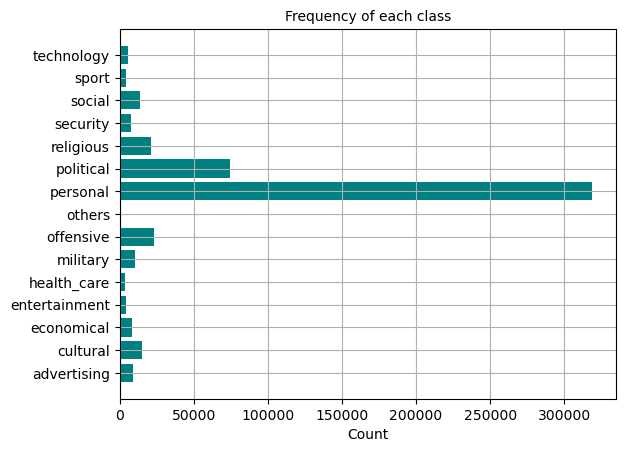

In [ ]:
plt.barh(keys, counts,color="#008080")
plt.title('Frequency of each class', fontsize=10);
plt.xlabel('Count')
plt.grid()
plt.show()

***
# $\text{Offensive Tweets Analysis}$

In [ ]:
offensive = []
for i in range(len(df)):
    attr = df['nlp'][i].get('offensive')
    if attr:
        offensive.extend([attr])

In [ ]:
keys, counts = np.unique(offensive, return_counts=True)

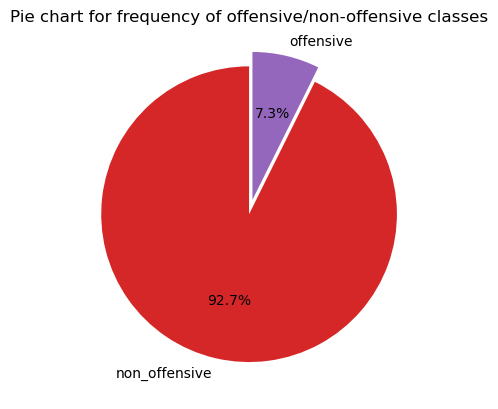

In [ ]:
plt.pie(counts, labels=keys, startangle=90, explode=[0, 0.1],autopct='%1.1f%%',colors=['C3', 'C4'])
plt.title('Pie chart for frequency of offensive/non-offensive classes')
plt.show()

In [ ]:
classes_count = dict()
for i in range(len(df)):
    classes = df['nlp'][i].get('classification')
    for c in classes:
        classes_count[c] = classes_count.get(c, 0)+1

In [ ]:
offensive_by_class = dict()
for i in range(len(df)):
    if df['nlp'][i].get('offensive') == 'offensive':
        classes = df['nlp'][i].get('classification')
        for c in classes:
            offensive_by_class[c] = offensive_by_class.get(c, 0)+1
for c, o in offensive_by_class.items():
    offensive_by_class[c] = offensive_by_class[c]/classes_count[c]*100

In [ ]:
offensive_by_class = sorted(offensive_by_class.items(), key=lambda x: x[1], reverse=False)

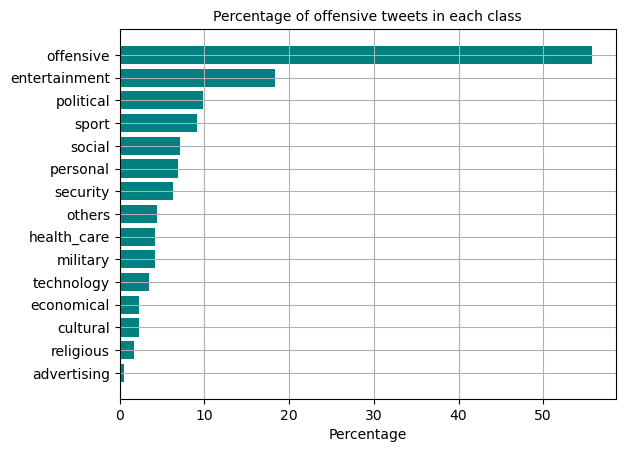

In [ ]:
plt.barh([elem[0] for elem in offensive_by_class], [elem[1] for elem in offensive_by_class],color="#008080")
plt.title('Percentage of offensive tweets in each class', fontsize=10);
plt.xlabel('Percentage')
plt.grid()
plt.show()

In [ ]:
for c in ['entertainment', 'sport', 'political']:
    print('='*80, c, '='*80, sep='\n')
    count = 0
    for i in range(len(df)):
        if c in df['nlp'][i].get('classification') \
            and df['nlp'][i].get('offensive') == 'offensive':
            print(df['text'][i], end='\n'+'-'*50+'\n')
            count += 1
            if count == 20:
                break

entertainment
@shayandehkordi @sepide_mhb جدی چرا یه دونه اینجوری پی وی من نیست؟هرچی هست کسخلو گلیه😐😐
--------------------------------------------------
فقط بدونم کدوم کصخلی میشینه حذفیای جومونگ دو و جومونگ یک رو میبینه  که هی تو اکسپلورم میاد
هرکی هستی کونت پارس کصکش =)))))))))
--------------------------------------------------
@MaryamS70339240 @PEYMANNOVIN1 بازیگریش افتضاحه. فقط بخاطر نشون دادن زیر شورتش و ممه های تا بتاش انتخابش میکنن کمونیست بیناموسو. 
اینقدر تو بازیش حرکات هیستریک و عقبی داشت که کسی که هنرپیشه تازه وارد هم باشه اینقدر افتضاح نیست تو بازیگریش.
--------------------------------------------------
@sunnny_pannni @KavehMadani تازه شانس آوردیم آهنگ تتلو نخوندن همونکه میگه کوسکش کاش اونم گوه شیفته میبست به کونه ما ایرانیان سنت شکنیم و هر کوسشعری هر جا بخواهیم میگیم و خر گوهی هم باشه میخوریم
--------------------------------------------------
@IsraelPersian به به 😂

پيام هاي بازرگاني ، با تبليغ كون ، شروع شد 😋😋😋

نوش جان حماس ، حلالتون باشه ، يا حماس 🥰
---------------------

***
# $\text{Emotions Analysis}$

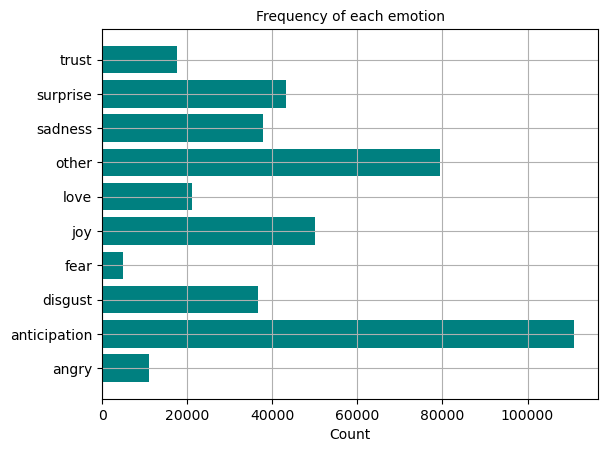

In [ ]:
emotions = []
for i in range(len(df)):
    emotion = df['nlp'][i].get('emotion')
    if emotion:
        emotions.extend(emotion)
keys, counts = np.unique(emotions, return_counts=True)

plt.barh(keys, counts,color="#008080")
plt.title('Frequency of each emotion', fontsize=10);
plt.xlabel('Count')
plt.grid()
plt.show()

***
# $\text{Sentiment Analysis}$

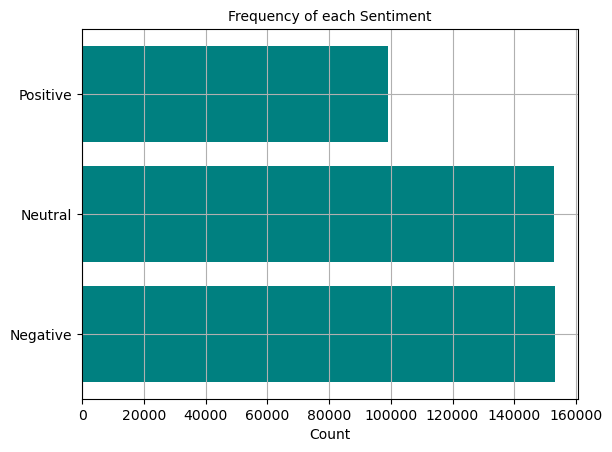

In [ ]:
sentiments = []
for i in range(len(df)):
    sentiment = df['nlp'][i].get('sentiment')
    if sentiment:
        sentiments.extend([sentiment])
keys, counts = np.unique(sentiments, return_counts=True)
plt.barh(keys, counts,color="#008080")
plt.title('Frequency of each Sentiment', fontsize=10);
plt.xlabel('Count')
plt.grid()
plt.show()

# $\text{Small World!}$

In [ ]:
twitter_rdd = sc.textFile("twitter_data_v2.jsonl")

In [ ]:
parsed_rdd = twitter_rdd.map(lambda x: json.loads(x))
parsed_rdd.count()

4175860

In [ ]:
def users_adjacency_creator(tweet):
    if tweet.get('tweet_type') == 'generated':
        return []

    if tweet.get('tweet_type') == 'quoted':
        try:
            quoting_uid = tweet.get('user').get('id')
        except: return []
        try:
            quoted_uid = tweet.get('quoted_status').get('user').get('id')
        except: return []

        return [(quoted_uid,[quoting_uid]) , (quoting_uid,[quoted_uid])]


    if tweet.get('tweet_type') == 'replied':
        try:
            replying_uid = tweet.get('user').get('id')
        except: return []
        try:
            replied_uid = tweet.get('in_reply_to_user_id_str')
        except: return []

        return [(replied_uid,[replying_uid]) , (replying_uid,[replied_uid])]


    if tweet.get('tweet_type') == 'retweeted':
        try:
            retweeting_uid = tweet.get('user').get('id')
        except: return []
        try:
            retweeted_uid = tweet.get('retweeted_status').get('user').get('id')
        except: return []

        return [(retweeted_uid,[retweeting_uid]) , (retweeting_uid,[retweeted_uid])]


In [ ]:
users_adjacency_rdd = parsed_rdd.flatMap(lambda x:users_adjacency_creator(x))
users_adjacency_rdd.count()

6730422

In [ ]:
users_rdd = users_adjacency_rdd.reduceByKey(lambda a,b: a+b)
users_rdd.count()

306674

In [ ]:
users_rdd.takeSample(False,1,841)

[('1536616423325372418', ['1509917913343537155', '840814070160842753'])]

In [ ]:
def edge_creator(user):
    edges = []
    for i in range(len(user[1])):
        edges.append((int(user[0]), int(user[1][i])))
    return edges

In [ ]:
edges_rdd = users_rdd.flatMap(lambda x:edge_creator(x))
edges = edges_rdd.collect()

In [ ]:
len(edges)

6730422

In [ ]:
distinct_users_rdd = users_rdd.map(lambda x:(int(x[0]),))
nodes = distinct_users_rdd.collect()

In [ ]:
len(nodes)

306674

In [ ]:
v = spark.createDataFrame(nodes, ["id"])
e = spark.createDataFrame(edges, ["src", "dst"])

In [ ]:
graph = GraphFrame(v, e)

In [ ]:
sample = [x[0] for x in random.sample(nodes, 100)]

In [ ]:
avg_path_length = graph.shortestPaths(landmarks=sample)
temp = avg_path_length.select("id", "distances")

In [ ]:
temp.write.json('dists.json')

In [ ]:
dists_ = temp.select('distances').rdd.flatMap(lambda x: x).collect()
means = []
for s in sample:
    dists = [x.get(s, np.NaN) for x in dists_]
    means.append(np.nanmean(dists))

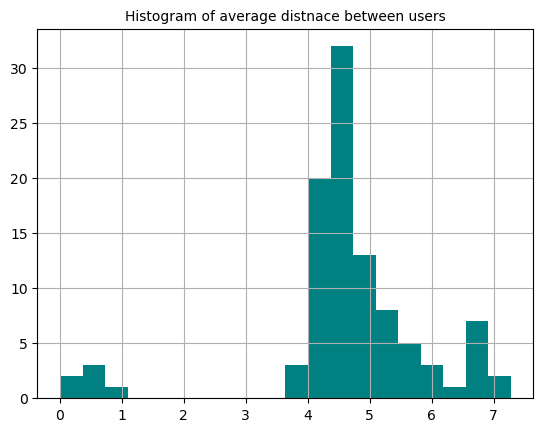

In [ ]:
plt.hist(means, bins=20,color="#008080")
plt.title('Histogram of average distnace between users', fontsize=10);
plt.grid()
plt.show()

In [ ]:
result = graph.labelPropagation(maxIter=3)
result.select("id", "label").show()

24/02/03 23:56:29 WARN TaskSetManager: Stage 5791 contains a task of very large size (8446 KiB). The maximum recommended task size is 1000 KiB.
24/02/04 00:05:30 WARN TaskSetManager: Stage 5800 contains a task of very large size (8446 KiB). The maximum recommended task size is 1000 KiB.
24/02/04 00:09:19 WARN TaskSetManager: Stage 5812 contains a task of very large size (8446 KiB). The maximum recommended task size is 1000 KiB.
24/02/04 00:12:41 WARN TaskSetManager: Stage 5827 contains a task of very large size (8446 KiB). The maximum recommended task size is 1000 KiB.


+-------+-------------------+
|     id|              label|
+-------+-------------------+
|  52073|1624290156386701312|
| 742703|          974907920|
|2285621|           42385985|
|2802391|         2572902906|
|2876691|1278768046828654592|
|2951731|             790728|
|3951121|            3951121|
|4135311|1285527106651410437|
|5081351|         4075582205|
|5145791| 815832079233478656|
|5146271|1057697633001709568|
|5618502|            5618502|
|5811172|            5811172|
|5813232|           49306230|
|6027322| 878531112183705600|
|7852122|1487014193236783107|
|8343022|         2860791416|
|8479912|1650749468759687168|
|9459802|          919019804|
|9959702|1466923054567723010|
+-------+-------------------+
only showing top 20 rows



In [ ]:
communities = result.select('label').rdd.flatMap(lambda x: x).collect()

In [ ]:
np.unique(communities).shape

(58890,)

In [ ]:
len(communities)

306674

In [ ]:
connected_comps = graph.connectedComponents()

24/02/04 00:35:52 WARN TaskSetManager: Stage 6041 contains a task of very large size (8446 KiB). The maximum recommended task size is 1000 KiB.


In [ ]:
connected_comps.select("id", "component").show()

+-------------------+------------------+
|                 id|         component|
+-------------------+------------------+
| 947728476135501825|              1605|
|           53753363|              1605|
|         2221999644|              1605|
|           22495731|              1605|
|1575910761796452360|              1605|
|          844914108|              1605|
|1556966158363934721|              1605|
|1643265849262743555|              1605|
|1551254851153264640|              1605|
|1722184916664721408|              1605|
|1574717801620770818|              1605|
|          731368688|              1605|
|1450044691374817285|              1605|
|1222530804749869061|872883791030890496|
|1577625122202165255|              1605|
|1729811838575992832|              1605|
|1603767524406984706|              1605|
| 703004222493691904|              1605|
|1457666964646674433|              1605|
|1614827490308153344|              1605|
+-------------------+------------------+
only showing top

In [ ]:
components = connected_comps.select('component').rdd.flatMap(lambda x: x).collect()

In [ ]:
np.unique(components).shape

(58890,)

In [ ]:
scc = graph.stronglyConnectedComponents(maxIter=10)

In [ ]:
scc.select("id", "component").show()

+-------+---------+
|     id|component|
+-------+---------+
|  52073|     1605|
| 742703|     1605|
| 807095|     1605|
| 939091|     1605|
|2285621|     1605|
|2559371|     1605|
|2802391|     1605|
|2876691|     1605|
|2951731|     1605|
|3062341|     1605|
|3737501|     1605|
|3951121|     1605|
|4135311|     1605|
|5081351|     1605|
|5145791|     1605|
|5146271|     1605|
|5618502|     1605|
|5811172|     1605|
|5813232|     1605|
|5887282|     1605|
+-------+---------+
only showing top 20 rows



In [ ]:
strongly_comps = scc.select('component').rdd.flatMap(lambda x: x).collect()

In [ ]:
np.unique(strongly_comps).shape

(7499,)

# $\text{It was at this moment I knew I should stream news!}$

In [ ]:
df['timestamp']

0        2024-01-17 22:42:48
1        2024-01-17 22:42:48
2        2024-01-17 22:42:48
3        2024-01-17 22:42:48
4        2024-01-17 22:42:48
                 ...        
999995   2024-01-17 22:52:02
999996   2024-01-17 22:52:02
999997   2024-01-17 22:52:02
999998   2024-01-17 22:52:02
999999   2024-01-17 22:52:02
Name: timestamp, Length: 1000000, dtype: datetime64[ns]

In [ ]:
time_rdd = parsed_rdd.map(lambda x: x.get('timestamp')).collect()

In [ ]:
min(time_rdd)

1705531367

In [ ]:
(max(time_rdd)-min(time_rdd))/60

38.35